# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [78]:
df = pd.read_csv('/Users/maxwinnick/Desktop/MDST-Onboarding-main/data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

In [79]:
# @@@ 1
unique_years = len(df['YEAR'].unique())
print(unique_years)

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [80]:
# @@@ 2
MICH_MATH_8 = df.loc[(df['STATE'] == 'MICHIGAN')] ['AVG_MATH_8_SCORE'].mean()
OHIO_MATH_8 = df.loc[(df['STATE'] == 'OHIO')] ['AVG_MATH_8_SCORE'].mean()
if(MICH_MATH_8 > OHIO_MATH_8):
    print('Michigan')
elif(MICH_MATH_8 < OHIO_MATH_8):
    print('Ohio')
else:
    print('Equal')

    

Ohio


Find the average for your chosen test across all states in 2019

In [81]:
# @@@ 3
US_AVG_MATH_8 = df['AVG_MATH_8_SCORE'].mean()
print(US_AVG_MATH_8)

278.28073089700996


For each state, find a maximum value for your chosen test score

In [82]:
max_math_8_scores = df.groupby('STATE')['AVG_MATH_8_SCORE'].max()
print(max_math_8_scores)

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [101]:
df['NORM_MATH_8_SCORE'] = (
    df['AVG_MATH_8_SCORE'] - df['AVG_MATH_8_SCORE'].mean()
) / df['AVG_MATH_8_SCORE'].std()

df['PER_STUDENT_TOTAL_REVENUE'] = df['TOTAL_REVENUE'] / df['ENROLL']
df['PER_STUDENT_FEDERAL_REVENUE'] = df['FEDERAL_REVENUE'] / df['ENROLL']
df['PER_STUDENT_STATE_REVENUE'] = df['STATE_REVENUE'] / df['ENROLL']
df['PER_STUDENT_LOCAL_REVENUE'] = df['LOCAL_REVENUE'] / df['ENROLL']

df['PER_STUDENT_LOCAL_STATE_REVENUE'] = (df['LOCAL_REVENUE'] + df['STATE_REVENUE']) / (df['ENROLL'])


Feature engineering justification: 

Normalization of AVG_MATH_8_SCORE: Normalizing the math scores allows for comparison across states, irrespective of scale differences.

Per-Student Revenue Metrics: Dividing total revenue (TOTAL_REVENUE) and its components (federal, state, local) by ENROLL adjusts for differences in student population sizes. This ensures that spending is analyzed on a per-student basis.

The PER_STUDENT_LOCAL_STATE_REVENUE: Represents the combined local and state revenue allocated per student across U.S. states, offering insight into state-level investment in education. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

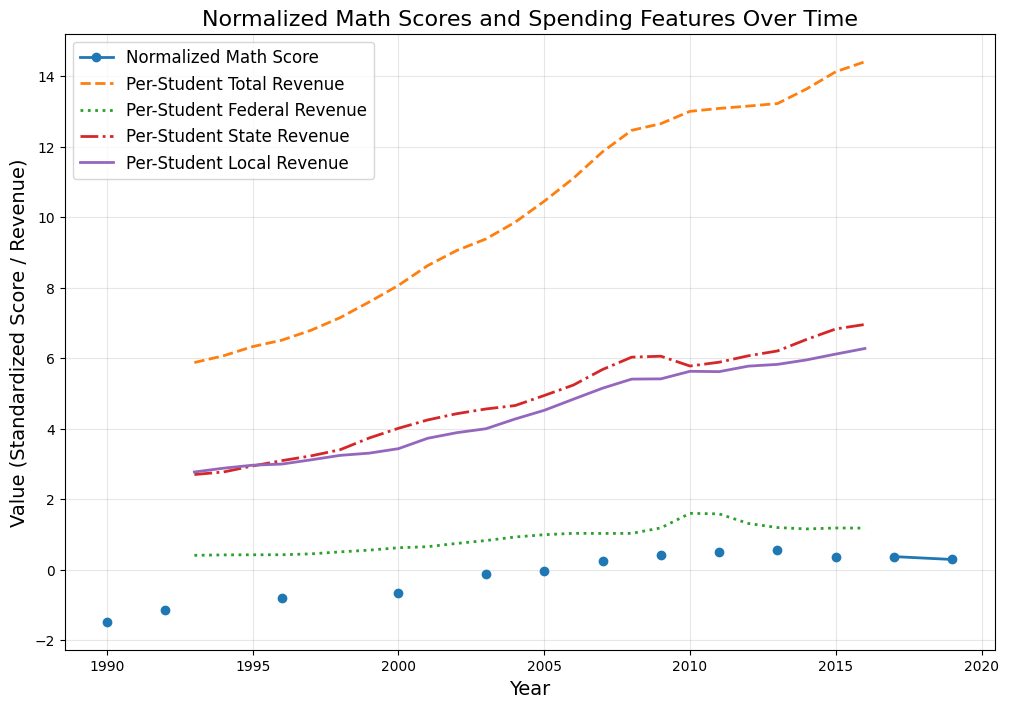

In [94]:
# @@@ 6
#This ommits non-numerical data from the data frame
numeric_columns = df.select_dtypes(include=['number']).columns

#This groups data by year and calcualtes the mean of the numeric columns
grouped_data = df.groupby('YEAR')[numeric_columns].mean()

#This creates the plot
plt.figure(figsize=(12, 8))

#This plots the standardized scores of the MATH_8 Exam over time
plt.plot(
    grouped_data.index, 
    grouped_data['NORM_MATH_8_SCORE'], 
    label='Normalized Math Score', 
    marker='o', 
    linewidth=2
)

#This plots the per-student spending features over time
plt.plot(
    grouped_data.index, 
    grouped_data['PER_STUDENT_TOTAL_REVENUE'], 
    label='Per-Student Total Revenue', 
    linestyle='--', 
    linewidth=2
)
plt.plot(
    grouped_data.index, 
    grouped_data['PER_STUDENT_FEDERAL_REVENUE'], 
    label='Per-Student Federal Revenue', 
    linestyle=':', 
    linewidth=2
)
plt.plot(
    grouped_data.index, 
    grouped_data['PER_STUDENT_STATE_REVENUE'], 
    label='Per-Student State Revenue', 
    linestyle='-.', 
    linewidth=2
)
plt.plot(
    grouped_data.index, 
    grouped_data['PER_STUDENT_LOCAL_REVENUE'], 
    label='Per-Student Local Revenue', 
    linestyle='-', 
    linewidth=2
)

# Adding titles and labels
plt.title('Normalized Math Scores and Spending Features Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Value (Standardized Score / Revenue)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()




The graph illustrates trends in normalized Grade 8 math scores and per-student spending over time, averaged across U.S. states. The normalized math scores show a gradual improvement, suggesting potential advancements in educational quality or student performance. Total per-student revenue exhibits an upward trend, indicating increased investment in education over the years. Among spending categories, federal revenue shows minimal growth, reflecting consistent but limited federal support. In contrast, state and local reveunue increases more dramatically, likely influenced by state-level economic conditions and policy changes and property taxes in wealthier districts. These trends suggest a positive correlation between increased spending and improved math scores, with state and local contributions appearing to have a more significant impact. Further analysis is needed to explore regional disparities or urban/rural differences in spending and educational outcomes.

**Visualization 2**

Text(0, 0.5, 'Normalized Math Score')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


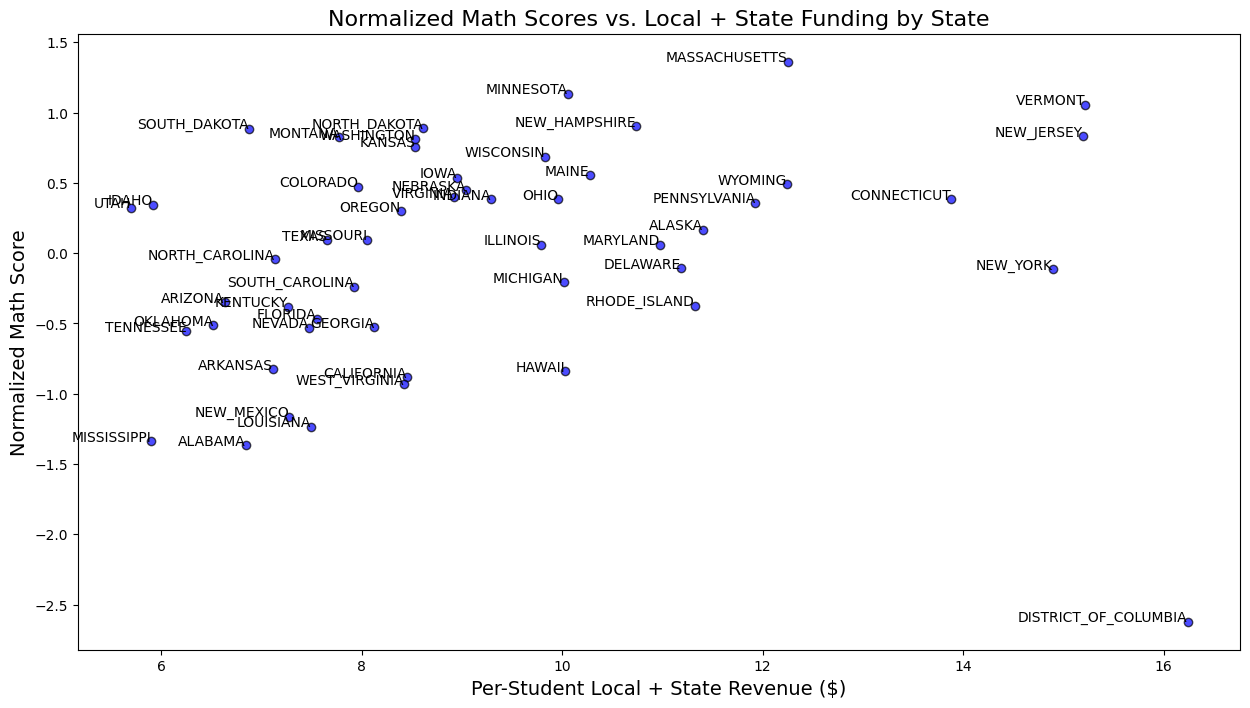

In [ ]:
# @@@ 7
#This ommits non-numerical data from the data frame
numeric_columns = df.select_dtypes(include=['number']).columns

#This groups data by year and calcualtes the mean of the numeric columns
state_grouped = df.groupby('STATE')[numeric_columns].mean()

#Scatterplot creation
plt.figure(figsize=(15, 8))
plt.scatter(
    state_grouped['PER_STUDENT_LOCAL_STATE_REVENUE'], 
    state_grouped['NORM_MATH_8_SCORE'], 
    color='blue', alpha=0.7, edgecolor='black'
)

#Labels
for state, row in state_grouped.iterrows():
    plt.text(
        row['PER_STUDENT_LOCAL_STATE_REVENUE'], 
        row['NORM_MATH_8_SCORE'], 
        state, fontsize=10, ha='right'
    )

#Titles and Axis Labels
plt.title('Normalized Math Scores vs. Local + State Funding by State', fontsize=16)
plt.xlabel('Per-Student Local + State Revenue ($)', fontsize=14)
plt.ylabel('Normalized Math Score', fontsize=14)



The scatterplot illustrates the relationship between average normalized Grade 8 math scores and combined local and state funding per student for each U.S. state. Each point represents a state, with its position determined by the average funding level (x-axis) and the corresponding math score (y-axis). The plot reveals a general trend where higher funding often correlates with better academic outcomes. Outliers are evident, where high spending does not necessarily translate into improved outcomes. Future work would overlay this heatmap into 4 maps of 48 contiguous states + Hawaii/Alaska in order to make it more visually appealing.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
# @@@ 8

# X =
# y = 

In [88]:
# @@@ 9 

# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [89]:
# @@@ 10
# import your sklearn class here


In [90]:
# @@@ 11
# create your model here
# model = 

In [91]:
#model.fit(X_train, y_train)

NameError: name 'model' is not defined

In [ ]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [ ]:
# @@@ 12


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [ ]:
# @@@ 13

# col_name = 'COLUMN NAME OF ONE PREDICTOR'


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior On Training Set")

In [ ]:
# @@@ 14


# col_name = 'COLUMN NAME OF ONE PREDICTOR"


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")